In [33]:
import pandas as pd 



In [34]:
#load the file 

disaster_data_to_load = "natural_disasters.csv"

disaster_df = pd.read_csv(disaster_data_to_load)
disaster_df.head()

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
0,DR-1992,Disaster,6/10/11,AK,Crooked Creek ANV/ANVSA,Flood,Ice Jam and Flooding,5/8/11,5/13/11,No,No,Yes,Yes
1,DR-1992,Disaster,6/10/11,AK,Kuspuk Regional Educational Attendance Area,Flood,Ice Jam and Flooding,5/8/11,5/13/11,No,No,Yes,Yes
2,DR-1992,Disaster,6/10/11,AK,Red Devil ANV/ANVSA,Flood,Ice Jam and Flooding,5/8/11,5/13/11,No,No,Yes,Yes
3,DR-4050,Disaster,12/22/11,AK,Bering Strait Regional Educational Attendance ...,Storm,Severe Winter Storms and Flooding,11/8/11,11/13/11,No,No,Yes,Yes
4,DR-4050,Disaster,12/22/11,AK,Lower Kuskokwim Regional Educational Attendanc...,Storm,Severe Winter Storms and Flooding,11/8/11,11/13/11,No,No,Yes,Yes


In [35]:
print (len(disaster_df))

6547


In [36]:
#how many disasters per year 

disaster_df['year start'] = pd.DatetimeIndex(disaster_df['Start Date']).year
disaster_df['year end'] = pd.DatetimeIndex(disaster_df['End Date']).year
disaster_df.dropna
disaster_df.tail()



,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program,year start,year end
6542,DR-4007,Disaster,7/22/11,WY,Weston County,Storm,"Severe Storms, Flooding, and Landslides",5/18/11,7/8/11,No,No,Yes,Yes,2011,2011
6543,DR-4227,Disaster,7/7/15,WY,Albany County,Flood,Severe Storms and Flooding,5/24/15,6/6/15,No,Yes,Yes,Yes,2015,2015
6544,DR-4227,Disaster,7/7/15,WY,Johnson County,Flood,Severe Storms and Flooding,5/24/15,6/6/15,No,Yes,Yes,Yes,2015,2015
6545,DR-4227,Disaster,7/7/15,WY,Niobrara County,Flood,Severe Storms and Flooding,5/24/15,6/6/15,No,Yes,Yes,Yes,2015,2015
6546,DR-4227,Disaster,7/7/15,WY,Platte County,Flood,Severe Storms and Flooding,5/24/15,6/6/15,No,Yes,Yes,Yes,2015,2015


In [37]:
print (len(disaster_df))

6547


In [38]:
disaster_clean_df = disaster_df[[ "State","Disaster Type" , "Disaster Title", "year start", "year end" ]]
disaster_clean_df.head()

,State,Disaster Type,Disaster Title,year start,year end
0,AK,Flood,Ice Jam and Flooding,2011,2011
1,AK,Flood,Ice Jam and Flooding,2011,2011
2,AK,Flood,Ice Jam and Flooding,2011,2011
3,AK,Storm,Severe Winter Storms and Flooding,2011,2011
4,AK,Storm,Severe Winter Storms and Flooding,2011,2011


In [40]:
disaster_clean_df.groupby("State").count()["Disaster Type"]

State
AK     26
AL    141
AR    193
AS      5
AZ     20
CA     62
CO     38
CT     49
DC      6
DE      9
FL    103
GA    169
GU      2
HI      9
IA    302
ID     21
IL    159
IN     72
KS    210
KY    387
LA    168
MA     61
MD     98
ME     24
MI     19
MN    213
MO    345
MP      3
MS    187
MT    103
NC    152
ND    182
NE    202
NH     40
NJ    123
NM     88
NV      1
NY    143
OH     62
OK    309
OR     41
PA    136
PR    103
RI     25
SC     84
SD    225
TN    247
TX    493
UT     24
VA    242
VI      7
VT     71
WA     69
WI     54
WV    197
WY     23
Name: Disaster Type, dtype: int64

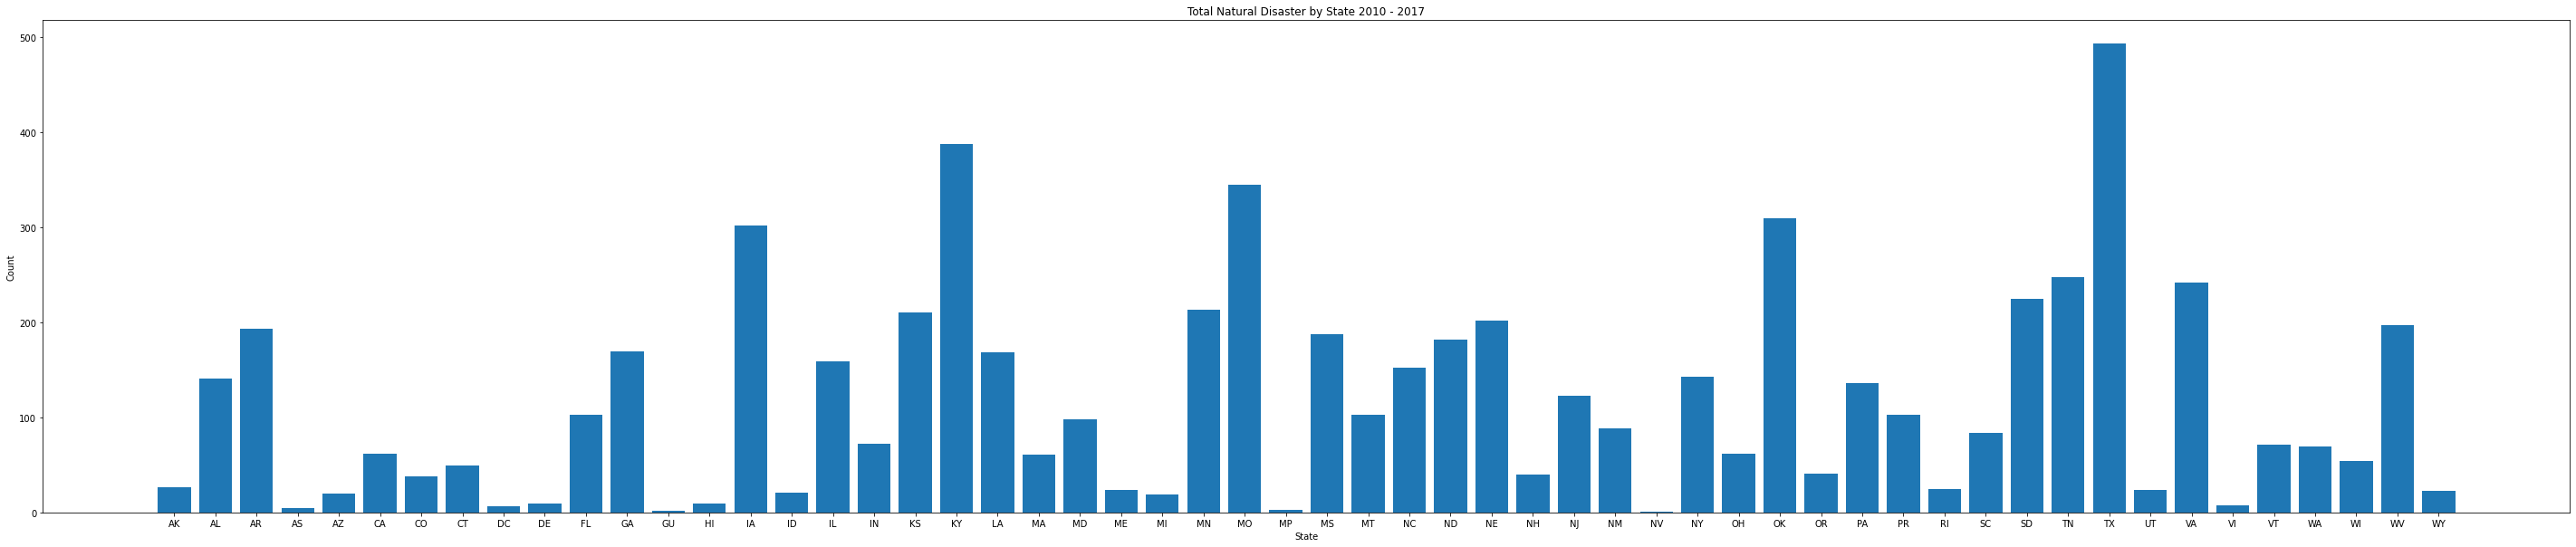

,Disaster Type,Disaster Title,year start,year end
State,,,,
AK,26,26,26,26
AL,141,141,141,141
AR,193,193,193,193
AS,5,5,5,5
AZ,20,20,20,20


In [53]:
#create a chart that takes user input based on state and will show all the natural disasters for that state 2010 -2017

state_grp = disaster_clean_df.groupby("State").count()
total_disaster_by_state = disaster_clean_df.groupby(["State"]).count()["Disaster Type"]


plt.figure(figsize=(50,10))
plt.bar(state_grp.index, total_disaster_by_state)

plt.title("Total Natural Disaster by State 2010 - 2017")
plt.xlabel("State")
plt.ylabel("Count")

plt.show()


state_grp.head()
#total_disaster_by_state

In [54]:
#disaster count by year by state 

#disaster_clean_df.groupby(["State", "year start"]).first()
state_grps = disaster_clean_df.groupby(["State", "Disaster Type", "year start"]).first()

state_grps.to_csv("grouped_disasters.csv")

state_grps.head(60)

Disaster Title  \
State Disaster Type year start                                                      
AK    Flood         2011                                     Ice Jam and Flooding   
                    2013                                                 Flooding   
      Storm         2011                        Severe Winter Storms and Flooding   
                    2012        Severe Storm, Straight-Line Winds, Flooding, a...   
                    2013         Severe Storms, Straight-Line Winds, and Flooding   
                    2015                                             Severe Storm   
AL    Hurricane     2012                                          Hurricane Isaac   
      Storm         2010        Severe Storms, Tornadoes, Straight-Line Winds,...   
                    2011        Severe Storms, Tornadoes, Straight-Line Winds,...   
                    2012        Severe Storms, Tornadoes, Straight-Line Winds,...   
                    2014        Severe Storms, Tornadoes, Straight-Line Winds,...   
                    2015        Severe Storms, Tornadoes, Straight-Line Winds,...   
AR    Ice           2012                                      Severe Winter Storm   
                    2013                                      Severe Winter Storm   
      Storm         2011        Severe Storms, Tornadoes, and Associated Flooding   
                    2013                   Severe Storms, Tornadoes, and Flooding   
                    2014                    Severe Storms,Tornadoes, and Flooding   
                    2015        Severe Storms, Tornadoes, Straight-Line Winds,...   
                    2016        Severe Storms, Tornadoes, Straight-Line Winds,...   
AS    Storm         2014                  Severe Storms, Flooding, and Landslides   
AZ    Flood         2014                               Severe Storms and Flooding   
      Storm         2010                        Severe Winter Storms and Flooding   
      Winter        2012                                            Severe Freeze   
CA    Earthquake    2010                                               Earthquake   
                    2014                                               Earthquake   
      Fire          2013                                                 Wildfire   
                    2015                               Valley Fire and Butte Fire   
      Flood         2010        Severe Winter Storms, Flooding, and Debris and...   
                    2014                   Severe Storms, Flooding, and Mudslides   
      Storm         2010        Severe Winter Storms, Flooding, and Debris and...   
                    2017                                      Severe Winter Storm   
      Tsunami       2011                                            Tsunami Waves   
CO    Fire          2012                     High Park and Waldo Canyon Wildfires   
                    2013                                    Black Forest Wildfire   
      Flood         2013        Severe Storms, Flooding, Landslides, and Mudsl...   
                    2015        Severe Storms, Tornadoes, Flooding, Landslides...   
CT    Hurricane     2011                                     Tropical Storm Irene   
                    2012                                          Hurricane Sandy   
      Snow          2011                                                Snowstorm   
      Storm         2010                               Severe Storms and Flooding   
                    2011                                             Severe Storm   
                    2013                        Severe Winter Storm and Snowstorm   
                    2015                        Severe Winter Storm and Snowstorm   
DC    Earthquake    2011                                               Earthquake   
      Hurricane     2011                                          Hurricane Irene   
                    2012                                          Hurric